# Lecture 10: Hypothesis testing using CLT

In [53]:
import random
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import scipy.stats as stats
import math
import pandas as pd

## Z-test

Example: A battery manufacturer claims that the average lifespan of their batteries is 1000 hours and standard deviation of 50 hours. A consumer protection agency takes a random sample of 50 batteries and finds the life span test results below


In [54]:
## G= stats.norm(loc=990, scale =50)  this is the distribution that generates the sample
num= 50
pop_mean = 1000
pop_std = 50

In [55]:
samples = np.round(np.array([ 959.83036412, 1073.83591095,  947.11012542,  974.08301781,
        970.76972989, 1075.34125545, 1007.71100707, 1048.17795209,
       1026.24217782,  993.06561007, 1016.42107326, 1034.61053146,
        973.58145713,  953.27290812,  986.49478201,  936.93182532,
       1001.51603418,  928.18025325,  988.87028315, 1010.44888354,
       1037.46726405,  974.13880069,  964.17121648, 1005.18555016,
        985.18793067, 1001.67274953, 1033.16035678, 1084.73118984,
        925.1548894 , 1013.17562785,  880.5910912 ,  985.87930874,
        950.74404353, 1002.79128662,  973.42630802,  994.11854132,
       1022.66071242,  991.31296348,  945.01966102,  880.65847317,
        919.39898568,  994.69965916, 1055.07843794,  996.31685035,
        965.46705285, 1001.02371721, 1096.61723664, 1015.13765773,
        952.55010887, 1042.15670143]))
samples
print(samples.mean())

991.9


In [56]:
# first, define the distribution of a standard normal variable.
G0 =  stats.norm()

In [57]:
# second, calculate the test statistics.
z_score = (samples.mean() - pop_mean)/(pop_std/np.sqrt(num))
z_score

-1.1455129855222104

In [58]:
# The probability of observed sample mean, given the manufacture state the truth
p_obs = G0.cdf(z_score)
p_obs

0.12599835970110446

In [59]:
alpha= 0.05
if p_obs >= 0.05:
    print("cannot reject the null hypothesis")
else:
    print("reject the null hypothesis")
  

cannot reject the null hypothesis


In [60]:
# Let's write a function to do Z-test
def myZtest(sample_mean, num,  pop_mean,pop_std, alpha, aux  = 'left-tail'):
    G0 = stats.norm()
    z_score =  (sample_mean - pop_mean)/(pop_std/np.sqrt(num))
    print("z-score is", z_score)
    if aux == 'left-tail':
        p_value =  G0.cdf(z_score)
    if aux == 'right-tail':
        p_value =  G0.sf(z_score)
    # initialize the decision
    answer =0 
    print("p_value:", p_value)
    if p_value >= alpha: # todo
        print("cannot reject the null hypothesis")
        answer = 0
    else:
        print("reject the null hypothesis")
        answer = 1
    return answer

In [61]:
answer =  myZtest(samples.mean(), len(samples), pop_mean, pop_std, alpha)

z-score is -1.1455129855222104
p_value: 0.12599835970110446
cannot reject the null hypothesis


In [62]:
# Two-sided Z-test

def myZtest2sided(sample_mean, num,    pop_mean, pop_std, alpha):
    G0=stats.norm()
    z_score = np.abs((sample_mean - pop_mean)/(pop_std/np.sqrt(num)))
    p_value =  G0.sf(z_score)
    print("z-score is", z_score)
    answer =0 
    print("p_value:", p_value)
    if p_value  > alpha/2: # todo
        print("cannot reject the null hypothesis")
        answer = 0
    else:
        print("reject the null hypothesis")
        answer = 1
    return answer

## two-sided Z-test

Evaluating the effect of a curriculum re-design on student performance.
1. The previous average score (\mu_0) was 75.
2. We collect a sample of 100 students who followed the new curriculum, and their average score is 78.
3. The population standard deviation is known to be 10.



In [63]:
answer2 =  myZtest2sided(78, 100, 75, 10, 0.05)

z-score is 3.0
p_value: 0.0013498980316300933
reject the null hypothesis


**<font color=blue>Example 2</font> The city of Gainesville claims the mean commute time on SW 24th Ave from I-75 to UF is 23 minutes with a variance of 50. You traveled that route 10 times over the last two weeks and had an average commute time of 27 minutes. Conduct a hypothesis test to determine whether the City of Gainesville’s model is reasonable. Reject the null hypothesis if $p < 0.01$.**

1. What is the null hypothesis? Define the density under $H_0$.

<!-- Null Hypothesis: city's model is correct.

\begin{align*}
X_i \sim \text{Gaussian}(23, \sigma_X^2 = 50)
\end{align*} -->

2. Compute the sample mean. Compute the bias and variance of the estimator.

3. What is the probability that observe a result this extreme?
<!-- One-sided hypothesis test:

\begin{align*}
P(\hat{\mu} \geq 27) = P\left(\frac{\hat{\mu} - 23}{\sigma_{\mu_X}} \geq \frac{27 - 23}{\sigma_{\mu_X}}\right) = P\left( Z \geq \frac{27-23}{\sqrt{5}} \right) = Q\left(\frac{27-23}{\sqrt{5}}\right) = Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*}

Two-sided hypothesis test:

\begin{align*}
P(|\hat{\mu}| \geq 27) = 2Q\left(\frac{4}{\sqrt{5}}\right)
\end{align*} -->

In [64]:
sample_mean = 27
num_trip =  10

In [65]:
G_trip = stats.norm(loc =23, scale = np.sqrt(50))

--interested to know, under the null hypothesis, what is the probability of average travel time of 10 trips >27

P(sample_mean > 27)? 

In [66]:
z_score_trip =  (27-23)/(G_trip.std()/np.sqrt(num_trip))

In [67]:
# P(sample_mean > 27)? 
z_score_trip
p_value=  G0.sf(z_score_trip)
p_value 

0.03681913506015133

In [68]:
myZtest(27, num_trip,  23, np.sqrt(50), 0.01, aux  = 'right-tail')

z-score is 1.7888543819998317
p_value: 0.03681913506015133
cannot reject the null hypothesis


0

## T-test: Unknown variance and small sample size!


If we use our *unbiased* estimator for the variance, then the distribution of

\begin{align*}
\frac{\hat{\mu}-\mu}{S_{N-1}/\sqrt{N}}
\end{align*}
where $S_{N-1}$ is the   standard error of the mean (SEM)

has a **Student’s $t$-distribution with $N-1$ degrees of freedom (dof)**.

* The density and distribution functions for the **Student's $t$-distribution** are shown on its [Wikipedia page](https://en.wikipedia.org/wiki/Student's_t-distribution).




- When the sample size is large (>30), the student t-distribution using estimated variance is very close to Standard normal distribution --- so we can also use the Z-test.

Example: A battery manufacturer claims that the average lifespan of their batteries is 1000 hours. A consumer protection agency takes a random sample of 50 batteries with the battery life test results below: 

Based on the observation, shall we reject the null hypothesis that the average life space is 1000 hours?

In [69]:
samples =  np.round(np.array([ 959.83036412, 1073.83591095,  947.11012542,  974.08301781,
        970.76972989, 1075.34125545, 1007.71100707, 1048.17795209,
       1026.24217782,  993.06561007, 1016.42107326, 1034.61053146,
        973.58145713,  953.27290812,  986.49478201,  936.93182532,
       1001.51603418,  928.18025325,  988.87028315, 1010.44888354,
       1037.46726405,  974.13880069,  964.17121648, 1005.18555016,
        985.18793067, 1001.67274953, 1033.16035678, 1084.73118984,
        925.1548894 , 1013.17562785,  880.5910912 ,  985.87930874,
        950.74404353, 1002.79128662,  973.42630802,  994.11854132,
       1022.66071242,  991.31296348,  945.01966102,  880.65847317,
        919.39898568,  994.69965916, 1055.07843794,  996.31685035,
        965.46705285, 1001.02371721, 1096.61723664, 1015.13765773,
        952.55010887, 1042.15670143]))
samples

array([ 960., 1074.,  947.,  974.,  971., 1075., 1008., 1048., 1026.,
        993., 1016., 1035.,  974.,  953.,  986.,  937., 1002.,  928.,
        989., 1010., 1037.,  974.,  964., 1005.,  985., 1002., 1033.,
       1085.,  925., 1013.,  881.,  986.,  951., 1003.,  973.,  994.,
       1023.,  991.,  945.,  881.,  919.,  995., 1055.,  996.,  965.,
       1001., 1097., 1015.,  953., 1042.])

In [70]:
pop_mean =1000

In [71]:
n=  len(samples)
T0 = stats.t(df = n-1)
est_std = samples.std(ddof = 1) # estimated std for X
# estimated std for mu_X: sample mean
est_std_sample_mean = est_std/np.sqrt(n)
est_std_sample_mean

6.6477094413283835

In [72]:
# or sem
sem = stats.sem(samples)
sem

6.6477094413283835

In [73]:
t_score =  (samples.mean()- pop_mean)/sem
t_score
p_value = T0.cdf(t_score)
p_value

0.11444078220259822

## implementing one-sided test, and two-sided T-test.

In [78]:
def myTtest(samples, pop_mean,alpha, aux  = 'left-tail'):
    num = len(samples)
    T0=stats.t(df=num-1) # use student t-distribution
    sem = stats.sem(samples)  # only need this change
    print("The estimated standard deviation:" , est_std)
    t_score = (samples.mean() - pop_mean)/sem    # and this
    if aux == 'left-tail':
        p_value = T0.cdf(t_score)
    if aux == 'right-tail':
        p_value = T0.sf(t_score)
    answer =0 
    print("p_value:", p_value)
    if p_value > alpha:  #todo:
        print("cannot reject the null hypothesis")
        answer = 0
    else:
        print("reject the null hypothesis")
        answer = 1
    return answer

In [ ]:
alpha = 0.05

In [79]:
answerT =  myTtest(samples, pop_mean, alpha, aux = 'left-tail')

The estimated standard deviation: 47.00640425321136
p_value: 0.11444078220259822
cannot reject the null hypothesis


In [ ]:
## two-sided T-test

In [83]:

def myTtest2sided(samples, pop_mean,alpha):
    num = len(samples)
    T0=stats.t(df=num-1 ) # use student t-distribution
    sem = stats.sem(samples)  # only need this change
    print("The estimated standard deviation:" , est_std)
    t_score =  np.abs(samples.mean() - pop_mean)/sem    #    and this
    p_value =  T0.sf(t_score)
    answer =0 
    print("p_value:", p_value)
    if p_value > alpha/2: #todo
        print("cannot reject the null hypothesis")
        answer = 0
    else:
        print("reject the null hypothesis")
        answer = 1
    return answer

In [84]:
answerT2 = myTtest2sided(samples, pop_mean, alpha)
answerT2

The estimated standard deviation: 47.00640425321136
p_value: 0.11444078220259822
cannot reject the null hypothesis


0

## Test of difference in the mean

To test for a difference between two population means, you can use a t-test or a z-test, depending on whether the population standard deviation is known or unknown and if the sample size is large enough. 

**<font color=blue>Example 1</font> Analytical Test on Difference of Means (T-Test)**

Conduct an **analytical** binary hypothesis test on whether urban and rural populations have different firearms mortality rates.

Recall the data "firearms-urban.csv" where the columns of interest for this investigation are:

* **RATE-2014**: The firearms mortality rate by state from 2014. 

* **Percent Urban**: The percentage of the total population in urban areas, from https://www.icip.iastate.edu/tables/population/urban-pct-states. Although this data is 2010, it should be sufficiently accurate for our purposes.

In [86]:
# Use the STATE column as the index
df = pd.read_csv('firearms-urban.csv')
df = df.set_index('STATE')
df

,RATE-2014,Percent Urban
STATE,,
AL,16.9,59.0
AK,19.2,66.0
AZ,13.5,89.8
AR,16.6,56.2
CA,7.4,95.0
CO,12.2,86.2
CT,5.0,88.0
DE,11.1,83.3
FL,11.5,91.2


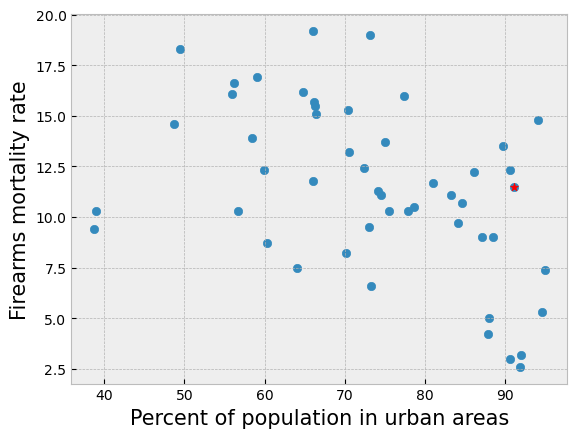

In [87]:
# Plot the data
# Highlight the point for Florida

plt.scatter(df['Percent Urban'],df['RATE-2014'])
plt.scatter(df.loc['FL']['Percent Urban'],df.loc['FL']['RATE-2014'],marker='*',c='r')
plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

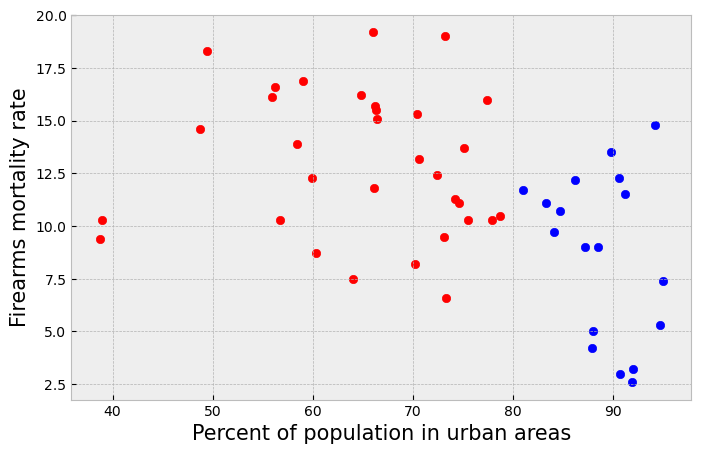

In [89]:
# Let's consider:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

plt.figure(figsize=(8,5))
urban = df['Percent Urban'][df['Percent Urban']>=80].to_numpy()
rural = df['Percent Urban'][df['Percent Urban'] < 80].to_numpy()

plt.scatter(urban,df['RATE-2014'][df['Percent Urban']>=80], c ='b')
plt.scatter(rural,df['RATE-2014'][df['Percent Urban']<80], c ='r')
plt.xlabel('Percent of population in urban areas',size=15)
plt.ylabel('Firearms mortality rate',size=15);

In [91]:
# Let's the firearm mortality rate for 2014 where:
# Urban - states with "Percent Urban">=80%
# Rural - states with "Percent Urban"<80%

# Extract data

urban_rate = df['RATE-2014'][df['Percent Urban']>=80].to_numpy()
rural_rate = df['RATE-2014'][df['Percent Urban']< 80].to_numpy()

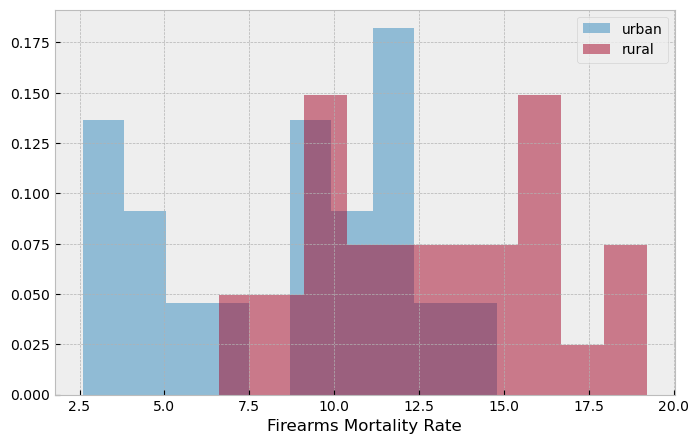

In [93]:
plt.figure(figsize=(8,5))
x = np.linspace(0,22,1000)

plt.hist(urban_rate, alpha= 0.5, label ='urban', density=True)
plt.hist(rural_rate, alpha= 0.5, label ='rural', density=True)

plt.legend()
plt.xlabel('Firearms Mortality Rate');

In [94]:
urban_sem = stats.sem(urban_rate)
urban_sem

0.9224348128855714

In [95]:
rural_sem = stats.sem(rural_rate)

In [96]:
diff_var = urban_sem**2 + rural_sem**2
diff_var

1.2226992400716261

In [103]:
# define the dof for T_score
ub = ((urban_sem**2 + rural_sem**2)**2)/((urban_sem**4)/(len(urban_rate)-1)+(rural_sem**4)/(len(rural_rate)-1))
ub
dof =math.floor(ub)
dof

31

In [105]:
T0_ur = stats.t(df =31, scale = np.sqrt(urban_sem**2 + rural_sem**2))

In [104]:
diff = rural_rate.mean()- urban_rate.mean()
diff

4.315972222222223

In [106]:
T0_ur.sf(diff)

0.0002388786244804265

In [ ]:
# Question: H0: The urban states and rural states have the same distribution. 